In [1]:
cd "../../../Downloads/NewbornEEGData-20220203T094950Z-001/NewbornEEGData/"

C:\Users\Benedetta\Downloads\NewbornEEGData-20220203T094950Z-001\NewbornEEGData


In [2]:
71463/500/60

2.3821

In [3]:
## rigettando anche sulla base del ppp

In [21]:
#num: is the baby's number,
#sil: is the kind of silence,
#theta: is the threshold

#The trials of all babies in silence X are contained in the trial_silenceX folder where each column is a good channel series 

def avalanche(fl2, theta):
    #print(fl2.shape)
    fl1 =( np.array(fl2)-np.mean(np.array(fl2),0))/(np.std(np.array(fl2),0))

    t=np.arange(0,len(fl1)/500,0.002)
    
    #We convert the table to an array
    fl1 = np.asarray(fl1)
    #fl1.shape
    #type(t), type(fl1)
    
    #We create a boolian array where all channels coincide simultaneously being grater than a threshold
    #len(fl1[0]) is the number of good channels 
    final_t = [np.array(np.abs(fl1[:,i]) > theta, dtype=float) for i in range(len(fl1[0]))]
    final_t = np.array(sum(final_t), dtype=bool)
    
    #We convert the boolian array to a float numeric
    final_t = np.array(final_t, dtype = float)
    
    #The key part
    av_indice_start = np.where((final_t[1:] - final_t[:-1]) >0)[0] + 1 # These are the indices where an avalanche begins
    av_indice_end = np.where((final_t[1:] - final_t[:-1])< 0)[0]    + 1# hese are the indices where an avalanche ends
    
    #We modify the content of both av_indice_start and av_indice_end depending on the 
    #initial and final values of final_t
    
    #Here both av_indice_start and av_indice_end register correctly all avalanche begginings and ends
    if final_t[0]==0 and final_t[-1]==0: 
        av_indice_start = av_indice_start
        av_indice_end = av_indice_end  # No changes on both arrays since they are correct at possitions and lenghts 
    
    #Here av_indice_end does not register the position of the end of the last avalanche  
    elif final_t[0]==0 and final_t[-1]==1:
        av_indice_end = np.append(av_indice_end,len(fl1[:,0])-1) 
    
    #Here av_indice_start does not register the position of the begining of the first avalanche
    elif final_t[0]==1 and final_t[-1]==0:
        av_indice_start = np.insert(av_indice_start,0,0)
    
    #Here av_indice_start does not register the position of the begining of the first avalanche
    # and av_indice_end does not register the position of the end of the last avalanche
    
    elif final_t[0]==1 and final_t[-1]==1:
        av_indice_start = np.insert(av_indice_start,0,0)
        av_indice_end = np.append(av_indice_end,len(fl1[:,0])-1)
                 
        
    global_signal = (sum([np.abs(fl1[:,i]) for i in range(len(fl1[0]))]))
    
    avalanche_sizes = []
    avalanche_dur = []

    for s in range(len(av_indice_start)):
        if len(av_indice_start) != len(av_indice_end):
            print('Error, they must be of the same length')
            break
        avalanche_sizes.append(np.sum(global_signal[av_indice_start[s]:av_indice_end[s]]))
        avalanche_dur.append((t[av_indice_end[s]]- t[av_indice_start[s]])/0.002)##??? giusto così ####
        
    return np.array(avalanche_sizes), np.array(avalanche_dur) 

In [5]:
#num: is the baby's number,
#sil: is the kind of silence,
#theta: is the threshold

#The trials of all babies in silence X are contained in the trial_silenceX folder where each column is a good channel series 

def intertimes(fl2, theta):
    #We import the z-score normalized trials of a specific baby according to his number and the kind of silence (1 or 2)
    #The number of good channels change in each baby 
    #fl1=pd.read_table("./trials_silence"+str(sil)+"/bb"+str(num)+"s"+str(sil)+".dat", sep="\s+", header = None)
    fl1 =( np.array(fl2)-np.mean(np.array(fl2),0))/(np.std(np.array(fl2),0))

    
    #We create a time array according to the lenght of fl1
    t=np.arange(0,len(fl1)/500,0.002)
    
    #We convert the table to an array
    fl1 = np.asarray(fl1)
    #fl1.shape
    #type(t), type(fl1)
    
    #We create a boolian array where all channels coincide simultaneously being grater than a threshold
    #len(fl1[0]) is the number of good channels 
    final_t = [np.array(np.abs(fl1[:,i]) > theta, dtype=float) for i in range(len(fl1[0]))]
    final_t = np.array(sum(final_t), dtype=bool)
    
    #We convert the boolian array to a float numeric
    final_t = np.array(final_t, dtype = float)
    
    #The key part
    av_indice_start = np.where((final_t[1:] - final_t[:-1]) <0)[0]  + 1# These are the indices where an avalanche begins
    av_indice_end = np.where((final_t[1:] - final_t[:-1])> 0)[0] + 1  # hese are the indices where an avalanche ends
    
    #We modify the content of both av_indice_start and av_indice_end depending on the 
    #initial and final values of final_t
    
    #Here both av_indice_start and av_indice_end register correctly all avalanche begginings and ends
    if final_t[0]==1 and final_t[-1]==1: 
        av_indice_start = av_indice_start
        av_indice_end = av_indice_end  # No changes on both arrays since they are correct at possitions and lenghts 
    
    #Here av_indice_end does not register the position of the end of the last avalanche  
    elif final_t[0]==1 and final_t[-1]==0:
        av_indice_end = np.append(av_indice_end,len(fl1[:,0])-1) 
    
    #Here av_indice_start does not register the position of the begining of the first avalanche
    elif final_t[0]==0 and final_t[-1]==1:
        av_indice_start = np.insert(av_indice_start,0,0)
    
    #Here av_indice_start does not register the position of the begining of the first avalanche
    # and av_indice_end does not register the position of the end of the last avalanche
    
    elif final_t[0]==0 and final_t[-1]==0:
        av_indice_start = np.insert(av_indice_start,0,0)
        av_indice_end = np.append(av_indice_end,len(fl1[:,0])-1)
               
        
    global_signal = (sum([np.abs(fl1[:,i]) for i in range(len(fl1[0]))]))
    
    #avalanche_sizes = []
    avalanche_dur = []

    for s in range(len(av_indice_start)):
        if len(av_indice_start) != len(av_indice_end):
            print('Error, they must be of the same length')
            break
        #avalanche_sizes.append(np.sum(global_signal[av_indice_start[s]:av_indice_end[s]]))
        avalanche_dur.append((t[av_indice_end[s]]- t[av_indice_start[s]])/0.002)##??? giusto così
        
    return np.array(avalanche_dur) 

In [6]:
def exponent(sample,maxxmin = "default",xmax = "default",lim = "default"):
    if maxxmin ==  "default":
        maxxmin = max(sample)
    if xmax ==  "default":
        xmax = max(sample)
    if lim ==  "default":
        lim = 4
        
    ypred = pwl.Fit(sample,xmin = (0.,maxxmin),xmax = xmax, parameter_range = {'alpha': [1,lim]}, discrete = False)
    return ypred.power_law.alpha, ypred.power_law.sigma

In [64]:
#plottare N vs millivolt diceva fabrizio......

In [7]:
from statsmodels.regression import linear_model as sm
from matplotlib import cm
def sgivent(sizes, durations):
    """
    returns unique values of durations and corresponding average sizes of avalanches
    """

    tot = [durations,sizes]

    singledur = np.sort(np.unique(durations))
    sdit = [[] for i in range(len(singledur))]
    for i in range(len(singledur)):
        for z in range(len(durations)):
            if tot[0][z] == singledur[i]:
                sdit[i].append(tot[1][z])

    medie = []
    std = []
    for i in range(len(sdit)):
        medie.append(np.mean(sdit[i]))
        std.append(np.std(sdit[i])/np.sqrt(len(sdit[i])))
    return singledur,np.array(medie),np.array(std)

def delta(alpha, salpha, tau, stau):
    """
    returns delta = (alpha - 1)/(tau - 1) and corresponding error estimate
    """
    return (alpha - 1)/(tau -1), np.sqrt((1/(tau -1))**2*salpha**2+ ((1-alpha)/(tau -1)**2)**2*stau**2)


def scaling(sizes, durations,  lim1 = 4 , lim2 = 4,ax = None, tau = "default", errtau = "default", alpha = "default", erralpha = "default", maxxminsizes = 100, maxxmindur = 0.05, xmaxsizes = "default", xmaxdur = "default", xminfit = 'default',xmaxfit = 'default', plotto = False,color= 'blue'):
    
    if ax == None:
        if plotto:
            fig = plt.figure(figsize = (6,4))
            ax = fig.add_subplot(1,1,1)
        
    if maxxminsizes ==  "default":
        maxxminsizes = max(sizes)
    if xmaxsizes ==  "default":
        xmaxsizes = max(sizes)

    
    if maxxmindur ==  "default":
        maxxmindur = max(durations)
    if xmaxdur ==  "default":
        xmaxdur = max(durations)
    
    
    if tau == "default" and errtau == "default":
        tau,errtau = exponent(sizes,maxxmin = maxxminsizes,xmax =xmaxsizes,lim = lim1,)
        
    if alpha == "default" and erralpha == "default":
        alpha,erralpha = exponent(durations,maxxmin = maxxmindur,xmax =xmaxdur,lim = lim2)

    pred =  delta(alpha, erralpha, tau, errtau )[0]
    errpred = delta(alpha, erralpha,tau, errtau)[1]


    durations = np.asarray(durations)
    if xminfit== 'default': xminfit = min(durations)
    if xmaxfit== 'default': xmaxfit = max(durations)
    
    
    prova = np.array([np.asarray(sizes), np.asarray(durations)])
    prova = prova.transpose()
    prova2 = [0 for i in range(len(prova))]
    
    for r in range(len(prova)):
        if prova[r][1] < xminfit  or prova[r][1] > xmaxfit :
            prova2[r] = False
        else:
            prova2[r] = True
            
    new = prova[prova2]
    
    a,b,c = sgivent(new[:,0],new[:,1])
    x = np.hstack((np.log10(a).reshape(-1,1), np.ones(len(a)).reshape(-1,1)))
    
    y = np.log10(b).reshape(-1,1)

    ols = sm.OLS(y,x)

    ols_result = ols.fit()
    
    fit = ols_result.params[0]
    errfit = ols_result.bse[0]
    inter =ols_result.params[1]

    grays = cm.Greys(np.linspace(0,1,15))
    reds = cm.Reds(np.linspace(0,1,15))
    greens = cm.Greens(np.linspace(0,1,15))
    blues = cm.Blues(np.linspace(0,1,30))

    nott = [0 for i in range(len(prova))]
    for r in range(len(prova)):
        if prova[r][1] < xminfit or prova[r][1] > xmaxfit :

            nott[r] = True
        else:

            nott[r] = False

    print('Prediction from crackling noise relation: delta = ',pred, '+-', errpred)
    print('Fit from of average size given duration points: delta = ',fit, '+-', errfit)

   
    x = durations
    #plotto = False
    #np.arange(xminfit,xmaxfit,0.002)
    if plotto:

        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.plot(new[:,1], new[:,0], '.', color = color,alpha = 0.3)
        ax.plot(np.asarray(durations)[nott],np.asarray(sizes)[nott], '.', color = 'gray', alpha = 0.5)
        ax.plot(x, (10**inter)*x**pred, 'r', label = 'Prediction', lw = 2)
        ax.plot(x, (10**inter)*x**fit, color = greens[12], label = 'Fit', lw = 2)
        #if errfit > errpred:
        #    ax.fill_between(x,(10**inter)*x**(fit + errfit*-3),
        #                     (10**inter)*x**(fit+ errfit*3),color= greens[3])


    #        ax.fill_between(x,(10**inter)*x**(pred+errpred*-3),
                             #(10**inter)*x**(pred+errpred*+3),color= "pink", alpha = 0.5)

       # else:
       #     ax.fill_between(x,(10**inter)*x**(pred+errpred*-3),
                             #(10**inter)*x**(pred+errpred*+3),color= "pink", alpha = 0.5)


          #  ax.fill_between(x,(10**inter)*x**(fit + errfit*-3),
                             #(10**inter)*x**(fit+ errfit*3),color= greens[3])

        x_annot_tau = 0.6
        y_annot_tau = 0.15
        ax.annotate(r'$\delta_{fit} =%2.2f \pm %2.2f $'%(round(fit,2), round(errfit,2) ),xy=(x_annot_tau,y_annot_tau),xycoords = 'axes fraction',fontsize= 17)

        x_annot_tau = 0.6
        y_annot_tau = 0.25

        ax.annotate(r'$\delta_{pred} =%2.2f \pm %2.2f$'%(round(pred,2) ,round(errpred,2) ),xy=(x_annot_tau,y_annot_tau),xycoords = 'axes fraction',fontsize= 17)
        ax.set_xlabel('Avalanche durations')
        ax.set_ylabel('Avalanche sizes')
        
        ax.legend(loc = (0.01,0.6))
        ax.errorbar(a,b,yerr = c, fmt = 'o', color = color,markersize = 3.5,barsabove = False,capsize = 3, elinewidth = 3,capthick = 1, alpha = .5)
    return np.asarray([pred, errpred,fit,errfit,a,b,c])

In [8]:
def surrogate(eeg_data):
    eeg_data_surr =[]
    for g in range(eeg_data.shape[0]):
        f = np.fft.fft(eeg_data[g])
        ab = np.abs(f)
        ph = np.angle(f)
        np.random.shuffle(ph)
        
        #ph = np.array([np.random.uniform(0,1)*2*np.pi for i in range(len(ph))])
        Xsurr = ab*(np.exp(1j*ph))
        #print(Xsurr.shape)
        xsurr = np.real(np.fft.ifft(Xsurr,))
        eeg_data_surr.append(xsurr)
    #print(np.asarray(eeg_data_surr).shape)
    return np.asarray(eeg_data_surr)


surrogate(data2)
print(data2.shape)


f = np.fft.fft(data2, axis = 1)
print(f.shape)
ab = np.abs(f)
ph = np.angle(f).T
old_ph = ph[:].T


np.random.shuffle(ph)
new_ph = ph.T
Xsurr = ab*(np.exp(1j*new_ph))
xsurr2 = np.real(np.fft.ifft(Xsurr,axis = 1))

        




plt.plot(new_ph[0], lw = 4) 
plt.plot(old_ph[0],) 

plt.xlim(0,30)

In [110]:
#os.mkdir("../../../Desktop/Criticality in barrel cortex/Surrogate-avalanches-data")

In [61]:
### COMPARISON BETWEEN SILENCE1 AND SILENCE2

import os
import numpy as np
import scipy.signal as ss
import scipy.io
#from dfa_functions import *

subjs  = [5,6,9,11,12,13,16,17,18,19,21,23,24,25,30,33,34,35,37,39,40,45,47,49,52,53,56,57,58,60,62,63,65,66,67,68,69,71,14,20,22,27,28,29,31,41,46,64,70]

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
from scipy.signal import welch
import pandas as pd
import mne

ch_names = ['F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8']
ss = []
dd = []
ss2 = []
dd2 = []
surrs =[]
surrd =[]

surrs2 =[]
surrd2 =[]


thre = 4
ch_names = np.array(ch_names)
sfreq = 500
info = mne.create_info(ch_names = list(ch_names),
                       ch_types = 'eeg',
                       sfreq = sfreq)
def find_bad_channels(data, MAX_PEAK=200, MAX_PEAK_SIGMA=15, MAX_DIST_PS=4.5e-3, OFFSET=30, fmin=1, fmax=100, 
                      verbose = False):
    idx_down, idx_up = 0, data.shape[1]
    ss = np.std(data)
    
    psds, freqs = mne.time_frequency.psd_welch(mne.io.RawArray(data/1e6, info, verbose=False), fmin=fmin, fmax=fmax, n_fft=2048, n_overlap=1024/2, verbose=False)
    psds = np.log10(psds)
    
    dist = [((tmp-psds.mean(axis=0))**2).sum() for tmp in psds]
    dist = np.array(dist) / (psds**2).sum() * 1e2
    
    rej = []
    for i, ch in enumerate(ch_names):
        delta = np.abs(data[i]).max()
    
        str_rej = str()

        if delta>MAX_PEAK or dist[i]>MAX_DIST_PS:
            rej.append(ch)
            str_rej = '-> rejected'
            str_rej += ' ('
            if delta>MAX_PEAK:
                str_rej += ' peak'
                idx = np.where(np.abs(data[i])>MAX_PEAK)[0]
            
            if dist[i]>MAX_DIST_PS:
                str_rej += ' ps'
            str_rej += ')'
            
        if verbose: print(f'* {ch}: max peak = {np.round(delta, 2)} mV ({np.round(delta/ss, 2)} std); dist ps = {np.round(dist[i],3)} '+str_rej)
        
        if delta>MAX_PEAK:
            if np.max(idx)/sfreq<OFFSET:
                idx_down = np.max([np.max(idx),idx_down])
                if verbose: print(f'[*] WARNING: Peak only in the initial part - time: {np.max(idx)/sfreq} s')
            if np.min(idx)/sfreq>180-OFFSET:
                idx_up = np.min([np.min(idx),idx_up])
                if verbose: print(f'[*] WARNING: Peak only in the last part - time: {np.min(idx)/sfreq} s')
    if verbose: print('\nBad channels:', rej, '\n')
    return rej, idx_down, idx_up




o = 0
for i, subj in enumerate(subjs):
    #print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up]
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up]
    nchan2 = data2.shape[0]
    print(nchan, nchan2)
    
    
    if nchan >= 5 and nchan2 >=5 and subj != 53:
        
        

        xsurr = surrogate(data)
        xsurr2 = surrogate(data2)
        
        

        #print('doing')
        s,d = avalanche(data.T,thre)
        s2,d2 = avalanche(data2.T,thre)
        ss.append(s.tolist())
        dd.append(d.tolist())
        ss2.append(s2.tolist())
        dd2.append(d2.tolist())
        
        
        
        s,d = avalanche(xsurr.T,thre)
        s2,d2 = avalanche(xsurr2.T,thre)
        surrs.append(s.tolist())
        surrd.append(d.tolist())
        surrs2.append(s2.tolist())
        surrd2.append(d2.tolist())
        
        
        #np.save("../../../Desktop/Criticality in barrel cortex/Surrogate-avalanches-data/sur_sizes_silence1_subject{}.npy".format(subj), s)
        #np.save("../../../Desktop/Criticality in barrel cortex/Surrogate-avalanches-data/sur_sizes_silence2_subject{}.npy".format(subj), s2)  
        #np.save("../../../Desktop/Criticality in barrel cortex/Surrogate-avalanches-data/sur_durations_silence1_subject{}.npy".format(subj), d)  
        #np.save("../../../Desktop/Criticality in barrel cortex/Surrogate-avalanches-data/sur_durations_silence2_subject{}.npy".format(subj), d2)
        
        o += 1
        

7 10
10 10
9 10
10 10
10 7
0 8
9 10
10 10
8 9
9 10
9 1
8 10
0 10
2 10
10 8
7 9
0 10
9 10
10 10
4 9
6 8
9 9
9 7
10 8
10 10
5 9
10 9
2 10
10 9
10 0
7 9
1 10
0 9
10 10
10 9
8 9
3 10
6 10
5 10
0 10
8 8
7 9
3 10
4 4
4 8
10 9
8 10
9 10
0 3


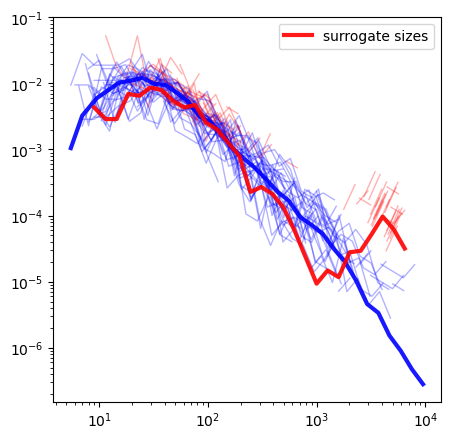

In [62]:
#thr = 4
plt.figure(figsize=(5,5))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrs)):
    if g ==0:
        try:
            pwl.plot_pdf(surrs[g], color ='red', alpha =.3, lw = 1)
            pwl.plot_pdf(ss[g], color ='blue', alpha = .3,lw = 1)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrs[g], color ='red',alpha =.3,lw = 1)
            pwl.plot_pdf(ss[g], color ='blue', alpha =.3,lw = 1)
        except:
            continue
        
    pool += ss[g]
    pool_surr += surrs[g]
    
#plt.figure()
for g in range(len(surrd)):
    if False:
        if g ==0:
            pwl.plot_pdf(surrs[g], color ='red', label = 'surrogate', alpha =.3)
            pwl.plot_pdf(ss[g], color ='blue', alpha = .3)
        else:
            pwl.plot_pdf(surrs[g], color ='red',alpha =.3)
            pwl.plot_pdf(ss[g], color ='blue', alpha =.3)

pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3)    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate sizes', lw =3)  

plt.legend();

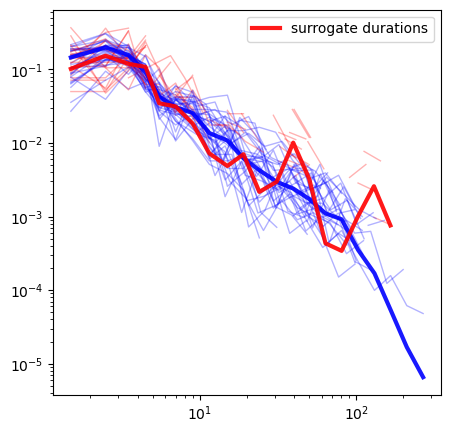

In [63]:
plt.figure(figsize=(5,5))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrd)):
    if g ==0:
        try:
            pwl.plot_pdf(surrd[g], color ='red', alpha =.3, lw = 1)
            pwl.plot_pdf(dd[g], color ='blue', alpha = .3,lw = 1)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrd[g], color ='red',alpha =.3,lw = 1)
            pwl.plot_pdf(dd[g], color ='blue', alpha =.3,lw = 1)
        except:
            continue
        
    pool += dd[g]
    pool_surr += surrd[g]
    
#plt.figure()
for g in range(len(surrd)):
    if False:
        if g ==0:
            pwl.plot_pdf(surrd[g], color ='red', label = 'surrogate', alpha =.3)
            pwl.plot_pdf(dd[g], color ='blue', alpha = .3)
        else:
            pwl.plot_pdf(surrd[g], color ='red',alpha =.3)
            pwl.plot_pdf(dd[g], color ='blue', alpha =.3)

pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3)    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate durations', lw =3)  

plt.legend();


(1, 1000)

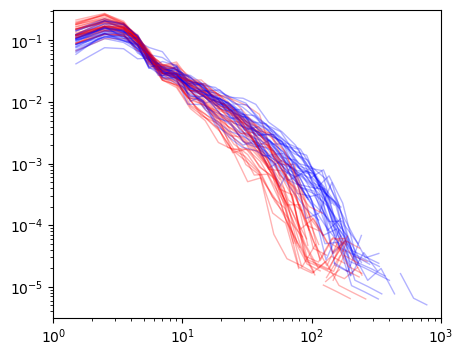

In [54]:
#thr =  3
plt.figure(figsize=(5,4))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrd)):
    if g ==0:
        try:
            pwl.plot_pdf(surrd[g], color ='red', alpha =.3, lw = 1)
            pwl.plot_pdf(dd[g], color ='blue', alpha = .3,lw = 1)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrd[g], color ='red',alpha =.3,lw = 1)
            pwl.plot_pdf(dd[g], color ='blue', alpha =.3,lw = 1)
        except:
            continue
        
    pool += dd[g]
    pool_surr += surrd[g]

plt.ylim(10**-5.5,10**-0.5)
plt.xlim(10**-0,10**3)

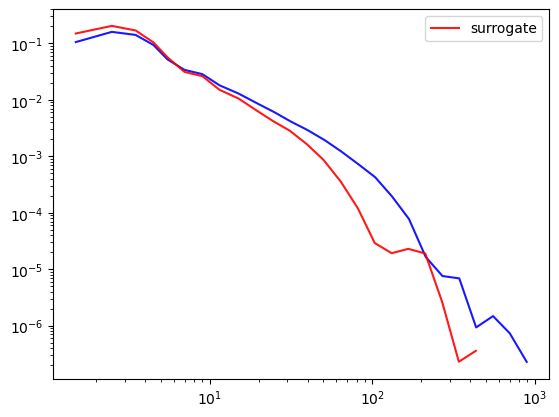

In [55]:
for g in range(len(surrs)):
    if False:
        if g ==0:
            pwl.plot_pdf(surrs[g], color ='red', label = 'surrogate', alpha =.3)
            pwl.plot_pdf(ss[g], color ='blue', alpha = .3)
        else:
            pwl.plot_pdf(surrs[g], color ='red',alpha =.3)
            pwl.plot_pdf(ss[g], color ='blue', alpha =.3)

pwl.plot_pdf(pool, color ='blue', alpha =.9)    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate')
plt.legend()

In [52]:
type(ss[g])

list

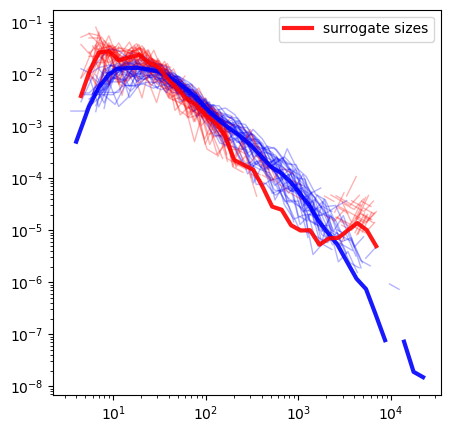

In [50]:
plt.figure(figsize=(5,5))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrs)):
    if g ==0:
        try:
            pwl.plot_pdf(surrs[g], color ='red', alpha =.3, lw = 1)
            pwl.plot_pdf(ss[g], color ='blue', alpha = .3,lw = 1)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrs[g], color ='red',alpha =.3,lw = 1)
            pwl.plot_pdf(ss[g], color ='blue', alpha =.3,lw = 1)
        except:
            continue
        
    pool += ss[g]
    pool_surr += surrs[g]
    
#plt.figure()
for g in range(len(surrd)):
    if False:
        if g ==0:
            pwl.plot_pdf(surrs[g], color ='red', label = 'surrogate', alpha =.3)
            pwl.plot_pdf(ss[g], color ='blue', alpha = .3)
        else:
            pwl.plot_pdf(surrs[g], color ='red',alpha =.3)
            pwl.plot_pdf(ss[g], color ='blue', alpha =.3)

pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3)    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate sizes', lw =3)  

plt.legend();

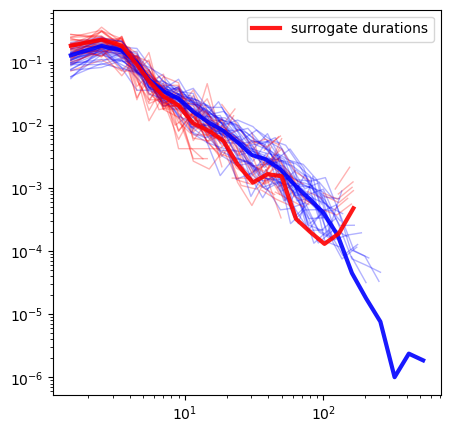

In [51]:
plt.figure(figsize=(5,5))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrd)):
    if g ==0:
        try:
            pwl.plot_pdf(surrd[g], color ='red', alpha =.3, lw = 1)
            pwl.plot_pdf(dd[g], color ='blue', alpha = .3,lw = 1)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrd[g], color ='red',alpha =.3,lw = 1)
            pwl.plot_pdf(dd[g], color ='blue', alpha =.3,lw = 1)
        except:
            continue
        
    pool += dd[g]
    pool_surr += surrd[g]
    
#plt.figure()
for g in range(len(surrd)):
    if False:
        if g ==0:
            pwl.plot_pdf(surrd[g], color ='red', label = 'surrogate', alpha =.3)
            pwl.plot_pdf(dd[g], color ='blue', alpha = .3)
        else:
            pwl.plot_pdf(surrd[g], color ='red',alpha =.3)
            pwl.plot_pdf(dd[g], color ='blue', alpha =.3)

pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3)    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate durations', lw =3)  

plt.legend();


In [77]:
bands = [[4,8],[8,13],[14,30],[31,60]]
fs =600
xminn = np.log2( (3/np.array(bands)[:,0])*fs)
xminn[-1] = xminn[-1] + 2
print(2**xminn)

[450.         225.         128.57142857 232.25806452]


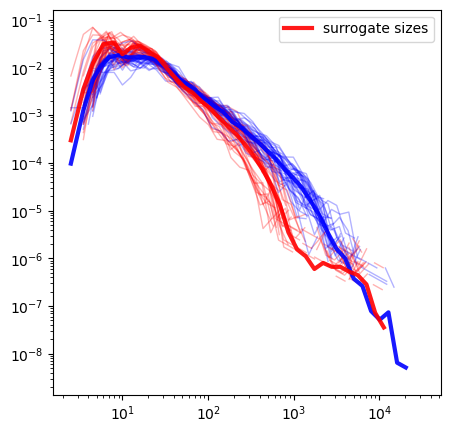

In [56]:
# thre = 2
plt.figure(figsize=(5,5))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrs)):
    if g ==0:
        try:
            pwl.plot_pdf(surrs[g], color ='red', alpha =.3, lw = 1)
            pwl.plot_pdf(ss[g], color ='blue', alpha = .3,lw = 1)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrs[g], color ='red',alpha =.3,lw = 1)
            pwl.plot_pdf(ss[g], color ='blue', alpha =.3,lw = 1)
        except:
            continue
        
    pool += ss[g]
    pool_surr += surrs[g]
    
#plt.figure()
for g in range(len(surrd)):
    if False:
        if g ==0:
            pwl.plot_pdf(surrs[g], color ='red', label = 'surrogate', alpha =.3)
            pwl.plot_pdf(ss[g], color ='blue', alpha = .3)
        else:
            pwl.plot_pdf(surrs[g], color ='red',alpha =.3)
            pwl.plot_pdf(ss[g], color ='blue', alpha =.3)

pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3)    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate sizes', lw =3)  

plt.legend();

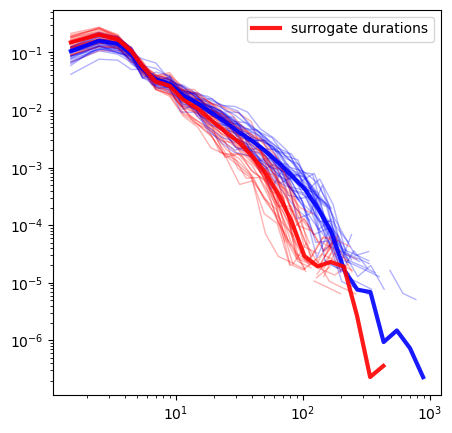

In [57]:
#thre = 2
plt.figure(figsize=(5,5))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrd)):
    if g ==0:
        try:
            pwl.plot_pdf(surrd[g], color ='red', alpha =.3, lw = 1)
            pwl.plot_pdf(dd[g], color ='blue', alpha = .3,lw = 1)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrd[g], color ='red',alpha =.3,lw = 1)
            pwl.plot_pdf(dd[g], color ='blue', alpha =.3,lw = 1)
        except:
            continue
        
    pool += dd[g]
    pool_surr += surrd[g]
    
#plt.figure()
for g in range(len(surrd)):
    if False:
        if g ==0:
            pwl.plot_pdf(surrd[g], color ='red', label = 'surrogate', alpha =.3)
            pwl.plot_pdf(dd[g], color ='blue', alpha = .3)
        else:
            pwl.plot_pdf(surrd[g], color ='red',alpha =.3)
            pwl.plot_pdf(dd[g], color ='blue', alpha =.3)

pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3)    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate durations', lw =3)  

plt.legend();


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import powerlaw as pwl

### Avalanche sizes and durations + $<s(t)>$ vs T exponents

In [11]:
### COMPARISON BETWEEN SILENCE1 AND SILENCE2

import os
import numpy as np
import scipy.signal as ss
import scipy.io
#from dfa_functions import *

overlap =0.5
bands = [[1,3],[4,8],[8,13],[14,30],[31,60]]
labels = ['band-1', 'band-2', 'band-3', 'band-4', 'band-5']
subjs  = [5,6,9,11,12,13,16,17,18,19,21,23,24,25,30,33,34,35,37,39,40,45,47,49,52,53,56,57,58,60,62,63,65,66,67,68,69,71,14,20,22,27,28,29,31,41,46,64,70]
print(len(subjs))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
from scipy.signal import welch
import pandas as pd
import mne

hh = 14
ch_names = ['F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8']
alphas1 = []
taus1 =[]

deltas1 = []
deltas2 = []


alphas2 = []
taus2 =[]

good_sub = []


ch_names = np.array(ch_names)
sfreq = 500
info = mne.create_info(ch_names = list(ch_names),
                       ch_types = 'eeg',
                       sfreq = sfreq)
o = 0
for i, subj in enumerate(subjs):
    print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up]
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up]
    nchan2 = data2.shape[0]
    print(nchan, nchan2)
    if nchan >= 5 and nchan2 >=5 and subj != 53:
   
        
        
        print('doing')
        s,d = avalanche(data.T,2)
        s2,d2 = avalanche(data2.T,2)
        #ss.append(s)
        #dd.append(d)
        #ss2.append(s2)
        #dd2.append(d2)
        
            
        v = scaling(s,d*0.002, plotto = False)

        deltas1.append(v[2])

        good_sub.append(subj)
        data = s
        fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
        exp = fit.power_law.alpha
        alphas1.append(exp)
        
        data = d*0.002
        fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
        exp = fit.power_law.alpha
        taus1.append(exp)

        data = s2
        fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
        exp = fit.power_law.alpha
        alphas2.append(exp)
        
        data = d2*0.002
        fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
        exp = fit.power_law.alpha
        taus2.append(exp)
        
        
        v = scaling(s2,d2*0.002, plotto = False)
        deltas2.append(v[2])
        
        

        o += 1
        

49


########## SUBJ 5 (1/49)##########
7 10
doing
(88117, 7)
(86680, 10)
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.7873068680611628 +- 0.14727491332246856
Fit from of average size given duration points: delta =  1.1452504842763758 +- 0.013812659375245746
Calculating best minimal value for power law fit


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_8124\880497259.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([pred, errpred,fit,errfit,a,b,c])


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.175836850726522 +- 0.07731676170996578
Fit from of average size given duration points: delta =  1.1465791447409868 +- 0.01193233947780699


########## SUBJ 6 (2/49)##########
10 10
doing
(90118, 10)
(94158, 10)
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.3825093022842319 +- 0.06065033026372372
Fit from of average size given duration points: delta =  1.114942077421657 +- 0.009961354387717067
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calcu

0 10


########## SUBJ 25 (14/49)##########
2 10


########## SUBJ 30 (15/49)##########
10 8
doing
(90144, 10)
(94721, 8)
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.1270829188080531 +- 0.06914344982827703
Fit from of average size given duration points: delta =  1.0888222544405939 +- 0.011035911883134067
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.2334869422514567 +- 0.08332768146751661
Fit from of average size given duration points: delta =  1.1411239264188795 +- 0.01125728222468981


########## SUBJ 33 (16/49)##########
7 9
doing
(90123, 7)
(97061, 9)
Calculating best minimal value

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.3774911559816019 +- 0.09713705388727342
Fit from of average size given duration points: delta =  1.1366894250265507 +- 0.010922860583956294


########## SUBJ 57 (28/49)##########
2 10


########## SUBJ 58 (29/49)##########
10 9
doing
(90125, 10)
(94764, 9)
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  2.1903744704772405 +- 0.15327260219096553
Fit from of average size given duration points: delta =  1.130978883971936 +- 0.0127625563356113
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculatin

3 10


########## SUBJ 29 (44/49)##########
4 4


########## SUBJ 31 (45/49)##########
4 8


########## SUBJ 41 (46/49)##########
10 9
doing
(90117, 10)
(95061, 9)
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.1839245835631969 +- 0.06038659760237341
Fit from of average size given duration points: delta =  1.1206925061596493 +- 0.012906843286881952
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.6870585403373424 +- 0.12781398579977285
Fit from of average size given duration points: delta =  1.1276325307332604 +- 0.009618226299855632


########## SUBJ 46 (47/49)##########
8 10
doing
(78031, 

In [14]:
os.listdir();

In [15]:
### ORDER OF THE LANGUAGES
order = pd.read_excel('../../../Downloads/ordine lingue.xlsx')#1 en, 2 fr, 3 sp

In [16]:

subject_french = order[order["last language"]==2]["subject"].values

subject_en = order[order["last language"]==1]["subject"].values

subject_span = order[order["last language"]==3]["subject"].values

In [17]:
sub_fren = (list(set(subject_french) & set(good_sub)))
sub_span = (list(set(subject_span) & set(good_sub)))
sub_en = (list(set(subject_en) & set(good_sub)))


In [18]:
list(map(len, [sub_fren, sub_span, sub_en]))

[12, 9, 11]

In [19]:
good_sub = np.asarray(good_sub)
alphas1 = np.asarray(alphas1)
alphas2 = np.asarray(alphas2)
taus1 = np.asarray(taus1)
taus2 = np.asarray(taus2)
deltas1 = np.asarray(deltas1)
deltas2 = np.asarray(deltas2)
#index. = np.where()

In [61]:
type(good_sub)

numpy.ndarray

In [20]:
h = []
for k in sub_fren:
    #if k in good_sub:
    #h.append(np.where(k == good_sub)[0])
    h.append(good_sub.tolist().index(k))
print(h)        
#np.concatenate(h)

[22, 23, 13, 2, 29, 3, 4, 16, 5, 7, 27, 19]


In [21]:
ll = np.concatenate([np.where(good_sub==i)[0] for i in sub_fren])

In [22]:
ll

array([22, 23, 13,  2, 29,  3,  4, 16,  5,  7, 27, 19], dtype=int64)

In [25]:
import scipy.stats as stats 

def funct(sub, vec1, vec2, option ='greater'):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    al2 = vec2[index]
    print(stats.ttest_rel(al1, al2,alternative = option) )
    

In [97]:
## TO DO
## dire a jesus di tetst 
## e branc param
## faccio t test on correaltions
## surrogate data set
## destroy correlations and then compute avalanches as a surrogate (shuffle tha phasess)
## give to Jesus the surrogate data
## give Lombardi signalfiltered in the theta banda

In [96]:
funct2(sub_fren, alphas1).mean(),funct2(sub_fren, alphas2).mean()

(1.855827756369483, 1.770702993325938)

In [26]:
funct(sub_fren,alphas1,alphas2)
funct(sub_en,alphas1,alphas2)
funct(sub_span,alphas1,alphas2)

TtestResult(statistic=1.7297750532415208, pvalue=0.05579564674997205, df=11)
TtestResult(statistic=0.46906388632858964, pvalue=0.32454162131138686, df=10)
TtestResult(statistic=0.7948377611550725, pvalue=0.22482160380457683, df=8)


In [27]:
funct(sub_fren,taus1,taus2)
funct(sub_en,taus1,taus2)
funct(sub_span,taus1,taus2)

TtestResult(statistic=0.4586333014336339, pvalue=0.327713190212272, df=11)
TtestResult(statistic=-1.6684876036139462, pvalue=0.9369101136817615, df=10)
TtestResult(statistic=-0.609947886580791, pvalue=0.7205903935951583, df=8)


In [29]:
funct(sub_fren,deltas1,deltas2, 'less')
funct(sub_en,deltas1,deltas2, 'less')
funct(sub_span,deltas1,deltas2, 'less')

TtestResult(statistic=-1.3390645776194292, pvalue=0.10378162073763555, df=11)
TtestResult(statistic=-3.481994245867945, pvalue=0.002950741220618934, df=10)
TtestResult(statistic=-0.8039396538100193, pvalue=0.22233091910302472, df=8)


In [30]:
# Importing library 
import scipy.stats as stats 
alphas1 =np.asarray(alphas1)
alphas2 =np.asarray(alphas2)

stats.ttest_rel(alphas1, alphas2,alternative = 'greater') 


TtestResult(statistic=1.7072676433503748, pvalue=0.048885502831148446, df=31)

In [32]:
# Importing library 
import scipy.stats as stats 
alphas1 =np.asarray(alphas1)
alphas2 =np.asarray(alphas2)

stats.ttest_rel(deltas1, deltas2,alternative = 'less') 

TtestResult(statistic=-3.06359372422484, pvalue=0.0022491829534972787, df=31)

In [35]:
# Importing library 
import scipy.stats as stats 
alphas1 =np.asarray(alphas1)
alphas2 =np.asarray(alphas2)

stats.ttest_rel(taus1, taus2,alternative = 'greater') 

TtestResult(statistic=-1.118319191046327, pvalue=0.8639888790049307, df=31)

In [38]:
# Importing library 
import scipy.stats as stats 
taus1 =np.asarray(taus1)
taus2 =np.asarray(taus2)

stats.ttest_rel(taus1, taus2,) 

TtestResult(statistic=-1.015727777328112, pvalue=0.3173776932365956, df=32)

In [31]:
stats.ttest_rel(deltas1, deltas2,alternative = 'less') 

TtestResult(statistic=-2.6655888161610273, pvalue=0.005972661835473558, df=32)

In [39]:
plt.rcParams['font.size'] = 17

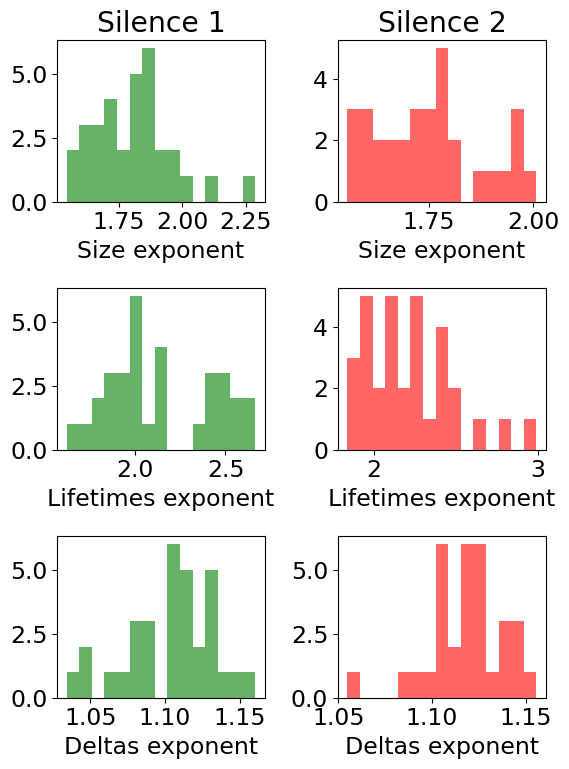

In [40]:
fig = plt.figure(figsize = (6,8))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)


ax1.hist(alphas1, color = 'green', alpha = .6, bins = 15)
ax2.hist(alphas2, color = 'red', alpha = .6, bins = 15)
ax1.set_title('Silence 1')
ax2.set_title('Silence 2')

ax1.set_xlabel('Size exponent')
ax2.set_xlabel('Size exponent')


#ax3.set_title('Silence 1')
#ax4.set_title('Silence 2')
ax3.hist(taus1, color = 'green', alpha = .6, bins = 15)
ax4.hist(taus2, color = 'red', alpha = .6, bins = 15)
ax3.set_xlabel('Lifetimes exponent')
ax4.set_xlabel('Lifetimes exponent')


#ax5.set_title('Silence 1')
#ax6.set_title('Silence 2')
ax5.hist(deltas1, color = 'green', alpha = .6, bins = 15)
ax6.hist(deltas2, color = 'red', alpha = .6, bins = 15)
ax5.set_xlabel('Deltas exponent');
ax6.set_xlabel('Deltas exponent');
plt.tight_layout();


# Intertimes distribution

In [77]:
### COMPARISON BETWEEN SILENCE1 AND SILENCE2

import os
import numpy as np
import scipy.signal as ss
import scipy.io
#from dfa_functions import *

overlap =0.5
bands = [[1,3],[4,8],[8,13],[14,30],[31,60]]
labels = ['band-1', 'band-2', 'band-3', 'band-4', 'band-5']
subjs  = [5,6,9,11,12,13,16,17,18,19,21,23,24,25,30,33,34,35,37,39,40,45,47,49,52,53,56,57,58,60,62,63,65,66,67,68,69,71,14,20,22,27,28,29,31,41,46,64,70]
print(len(subjs))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
from scipy.signal import welch
import pandas as pd
import mne

hh = 14
ch_names = ['F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8']
intert1 = []
intert2 =[]

ch_names = np.array(ch_names)
sfreq = 500
info = mne.create_info(ch_names = list(ch_names),
                       ch_types = 'eeg',
                       sfreq = sfreq)

o = 0
for i, subj in enumerate(subjs):
    print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up]
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up]
    nchan2 = data2.shape[0]
    print(nchan, nchan2)
    if nchan >= 5 and nchan2 >=5 and subj != 53:
        
        
        print('doing')
        d = intertimes(data.T,2)
        d2 = intertimes(data2.T,2)
        
        intert1.append(d*0.002*1000)
        
        intert2.append(d2*0.002*1000)
        o += 1
        

49


########## SUBJ 5 (1/49)##########
7 10
doing


########## SUBJ 6 (2/49)##########
10 10
doing


########## SUBJ 9 (3/49)##########
9 10
doing


########## SUBJ 11 (4/49)##########
10 10
doing


########## SUBJ 12 (5/49)##########
10 7
doing


########## SUBJ 13 (6/49)##########
0 8


########## SUBJ 16 (7/49)##########
9 10
doing


########## SUBJ 17 (8/49)##########
10 10
doing


########## SUBJ 18 (9/49)##########
8 9
doing


########## SUBJ 19 (10/49)##########
9 10
doing


########## SUBJ 21 (11/49)##########
9 1


########## SUBJ 23 (12/49)##########
8 10
doing


########## SUBJ 24 (13/49)##########
0 10


########## SUBJ 25 (14/49)##########
2 10


########## SUBJ 30 (15/49)##########
10 8
doing


########## SUBJ 33 (16/49)##########
7 9
doing


########## SUBJ 34 (17/49)##########
0 10


########## SUBJ 35 (18/49)##########
9 10
doing


########## SUBJ 37 (19/49)##########
10 10
doing


########## SUBJ 39 (20/49)##########
4 9


########## SUBJ 40 (21/49)##########
6 8
doi

In [69]:
len(intert1[0])

692

In [78]:
### ORDER OF THE LANGUAGES
order = pd.read_excel('../../../Downloads/ordine lingue.xlsx')#1 en, 2 fr, 3 sp


subject_french = order[order["last language"]==2]["subject"].values

subject_en = order[order["last language"]==1]["subject"].values

subject_span = order[order["last language"]==3]["subject"].values

sub_fren = (list(set(subject_french) & set(good_sub)))
sub_span = (list(set(subject_span) & set(good_sub)))
sub_en = (list(set(subject_en) & set(good_sub)))


good_sub = np.asarray(good_sub)

#index. = np.where()

type(good_sub)

h = []
for k in sub_fren:
    #if k in good_sub:
    #h.append(np.where(k == good_sub)[0])
    h.append(good_sub.tolist().index(k))
print(h)        
#np.concatenate(h)

ll = np.concatenate([np.where(good_sub==i)[0] for i in sub_fren])

ll

def funct(sub, vec1, vec2):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    al2 = vec2[index]
    print(stats.ttest_rel(al1, al2,alternative = 'less') )
    
    

def funct2(sub, vec1):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    #al2 = vec2[index]
    return al1
    #print(stats.ttest_rel(al1, al2,alternative = 'less') )
    

[22, 23, 13, 2, 29, 3, 4, 16, 5, 7, 27, 19]


In [81]:
intert1 = np.asarray(intert1)
intert2 = np.asarray(intert2)

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_8124\642629623.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  intert1 = np.asarray(intert1)
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_8124\642629623.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  intert2 = np.asarray(intert2)


In [82]:
intert1.shape

(32,)

In [83]:
intert1_french = funct2(sub_fren, intert1)
intert1_span = funct2(sub_span, intert1)
intert1_en= funct2(sub_en, intert1)

intert2_french = funct2(sub_fren, intert2)
intert2_span = funct2(sub_span, intert2)
intert2_en= funct2(sub_en, intert2)

In [84]:
arr1 = np.asarray([intert1_french,intert1_span, intert1_en])
arr2 = np.asarray([intert2_french,intert2_span, intert2_en])

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_8124\21691924.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr1 = np.asarray([intert1_french,intert1_span, intert1_en])
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_8124\21691924.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr2 = np.asarray([intert2_french,intert2_span, intert2_en])


<Axes: >

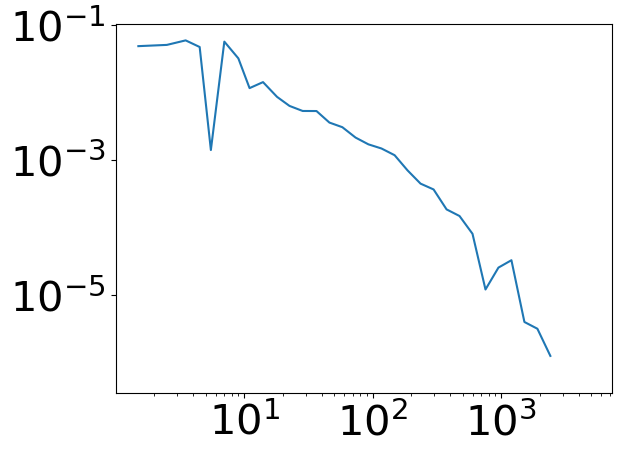

In [85]:
pwl.plot_pdf(intert1[10])

<Axes: >

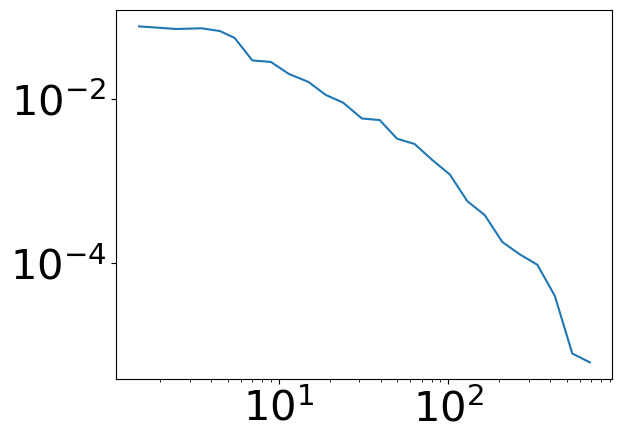

In [72]:
pwl.plot_pdf(arr1[0][-1])

In [52]:
plt.rcParams['font.size'] = 14

1


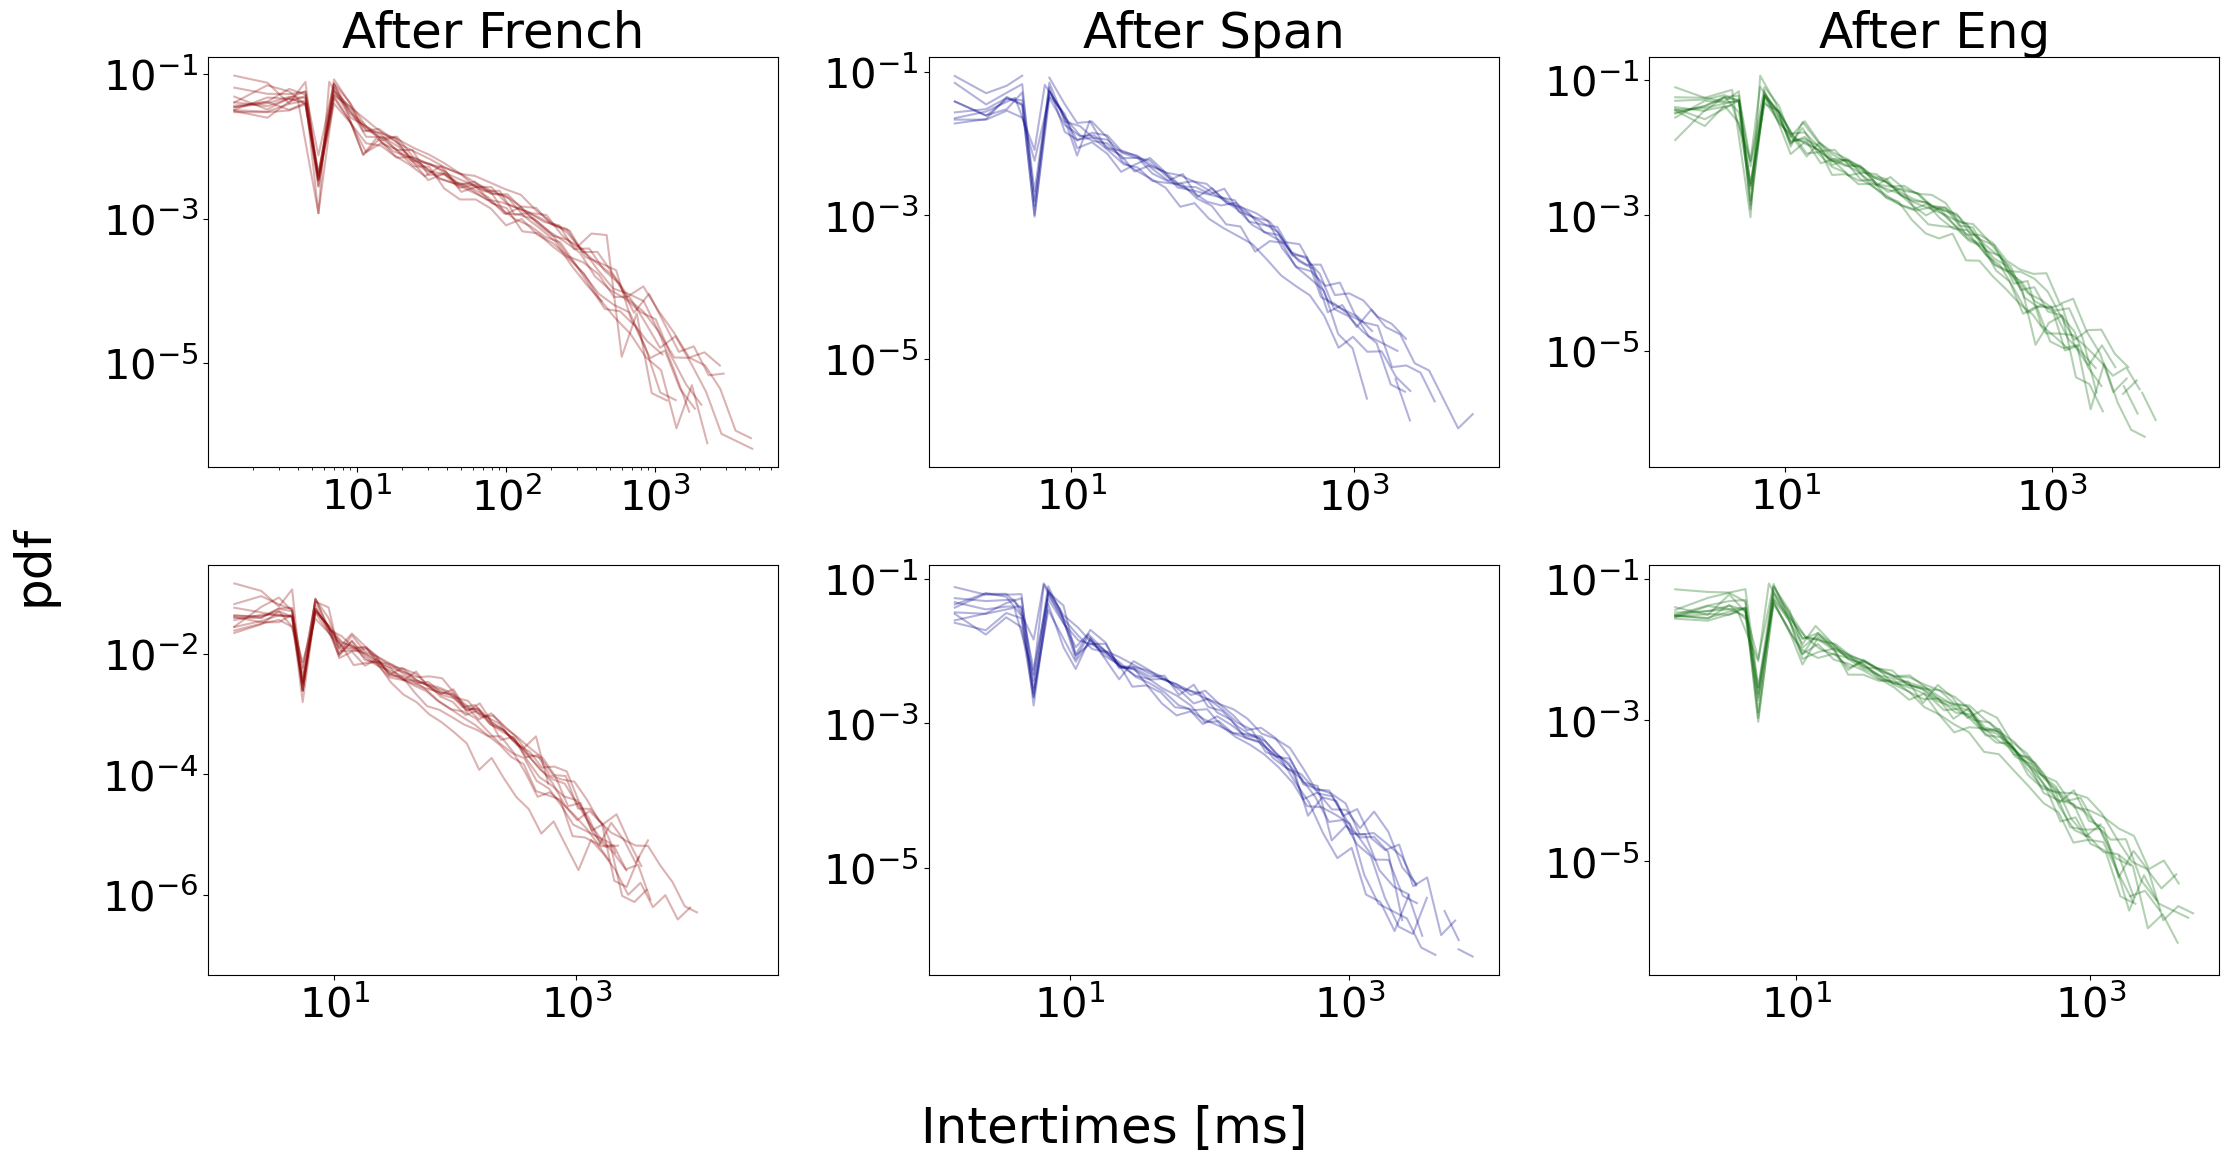

In [88]:
## thes = 3
time_in_sec = 8
interv =1
plt.rcParams['font.size'] = 30
fig = plt.figure(figsize = (23,12))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)



for j in range(arr1[0].shape[0]):
    pwl.plot_pdf(arr1[0][j],color ='darkred', alpha = .3, ax = ax1)
    #ax1.plot(lags,np.mean(arr1[0],0),color ='darkred', alpha = 1)

for j in range(arr1[1].shape[0]):
    try:
        pwl.plot_pdf(arr1[1][j],color ='darkblue', alpha = .3, ax = ax2)
    except:
        print(j)
        continue

    #ax2.plot(lags,np.mean(arr1[1],0),color ='darkblue', alpha = 1)

#ax3.plot(lags,arr1[2].T,color ='darkgreen', alpha = .3)
for j in range(arr1[2].shape[0]):
    pwl.plot_pdf(arr1[2][j],color ='darkgreen', alpha = .3, ax = ax3)
#ax3.set_yscale('log')
#ax3.set_xlim(0.01,time_in_sec)
#ax3.set_ylim(10**-2.5,1);
#ax3.plot(lags,np.mean(arr1[2],0),color ='darkgreen', alpha = 1)



#ax3.plot(lags,arr1[2].T,color ='darkgreen', alpha = .3)
for j in range(arr2[0].shape[0]):
    pwl.plot_pdf(arr2[0][j],color ='darkred', alpha = .3, ax = ax4)
#ax3.plot(lags,arr1[2].T,color ='darkgreen', alpha = .3)
for j in range(arr2[1].shape[0]):
    pwl.plot_pdf(arr2[1][j],color ='darkblue', alpha = .3, ax = ax5)
    
    

#ax3.plot(lags,arr1[2].T,color ='darkgreen', alpha = .3)
for j in range(arr2[2].shape[0]):
    pwl.plot_pdf(arr2[2][j],color ='darkgreen', alpha = .3, ax = ax6)





fig.supylabel('pdf')
fig.supxlabel('Intertimes [ms]')
ax1.set_title('After French')
ax2.set_title('After Span')
ax3.set_title('After Eng');
plt.tight_layout();

# Plots

In [91]:
value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (14,8))
fig.suptitle('Silence 1 avalanches')
axs = fig.add_subplot(2,2,1)
axd = fig.add_subplot(2,2,2)
axsh = fig.add_subplot(2,2,3)
axdh = fig.add_subplot(2,2,4)
alphas = []

taus = []
totals = []
totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(ss)):

    s = ss[i]
    d = dd[i]*0.002
    data = s
    fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = value)
    exp = fit.power_law.alpha
    pwl.plot_pdf(data,color = 'tab:red', marker = '.', ax = axs, alpha = 0.3)
    #fit.power_law.plot_pdf(data,color = 'tab:red' ,linestyle = '--', ax = axs)

    #axs.annotate("alpha= {}".format(round(exp,2)),[0.8,0.5])
    alphas.append(exp)
    data = d
    fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
    exp = fit.power_law.alpha
    pwl.plot_pdf(data,color = 'tab:green', marker = '.', ax = axd, alpha = 0.3)
    taus.append(exp)
    #if i == 1: break



    totals += ss[i].tolist()
    totald += d.tolist()
    #i+=1

axs.set_xlabel(r'Avalanche sizes')
axs.set_ylabel(r'pdf')
#fit.power_law.plot_pdf(data,color = 'tab:green' ,linestyle = '--', ax = axd, alpha = 0.6)
axd.set_xlabel(r'Avalanche lifetimes')
axd.set_ylabel(r'pdf')
#axd.annotate("alpha= {}

totals = np.asarray(totals)
totald = np.asarray(totald)

data = totals
fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = value)
exp = fit.power_law.alpha
axs.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction',fontsize = 11)

pwl.plot_pdf(data,color = 'tab:red', marker = '.', ax = axs)
fit.power_law.plot_pdf(data,color = 'tab:red' ,linestyle = '--',ax = axs)


data = totald
fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False,)
exp = fit.power_law.alpha
axd.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction', fontsize = 11)
pwl.plot_pdf(data,color = 'tab:green', marker = '.', ax = axd)
fit.power_law.plot_pdf(data,color = 'tab:green' ,linestyle = '--', ax = axd)



axsh.hist(alphas, bins = 15, color = 'red', alpha = .5, density = True)
axsh.set_xlabel('Alphas')
axsh.set_ylabel('pdf')

axdh.hist(taus, bins = 15, color = 'green', alpha = .5, density = True)
axdh.set_xlabel('Taus')
axdh.set_ylabel('pdf')
        
plt.tight_layout()

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000001DE9AF1EC10> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x000001DEA35E3280> (for post_execute):



KeyboardInterrupt



In [ ]:
value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (14,8))
fig.suptitle('Avalanches silence 2')
axs = fig.add_subplot(2,2,1)
axd = fig.add_subplot(2,2,2)
axsh = fig.add_subplot(2,2,3)
axdh = fig.add_subplot(2,2,4)
alphas = []

taus = []
totals = []
totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(ss)):

    s = ss2[i]
    d = dd2[i]*0.002
    data = s
    fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = value)
    exp = fit.power_law.alpha
    pwl.plot_pdf(data,color = 'tab:red', marker = '.', ax = axs, alpha = 0.3)
    alphas.append(exp)
    
    
    data = d
    fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
    exp = fit.power_law.alpha
    pwl.plot_pdf(data,color = 'tab:green', marker = '.', ax = axd, alpha = 0.3)
    taus.append(exp)
    #if i == 1: break



    totals += ss2[i].tolist()
    totald += d.tolist()
    #i+=1


axs.set_xlabel(r'Avalanche sizes')
axs.set_ylabel(r'pdf')
axd.set_xlabel(r'Avalanche lifetimes')
axd.set_ylabel(r'pdf')
totals = np.asarray(totals)
totald = np.asarray(totald)

data = totals
fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = value)
exp = fit.power_law.alpha
axs.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction',fontsize = 11)

pwl.plot_pdf(data,color = 'tab:red', marker = '.', ax = axs)
fit.power_law.plot_pdf(data,color = 'tab:red' ,linestyle = '--',ax = axs)


data = totald
fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False,)
exp = fit.power_law.alpha
axd.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction', fontsize = 11)
pwl.plot_pdf(data,color = 'tab:green', marker = '.', ax = axd)
fit.power_law.plot_pdf(data,color = 'tab:green' ,linestyle = '--', ax = axd)



axsh.hist(alphas, bins = 15, color = 'red', alpha = .5, density = True)
axsh.set_xlabel('Alphas')
axsh.set_ylabel('pdf')

axdh.hist(taus, bins = 15, color = 'green', alpha = .5, density = True)
axdh.set_xlabel('Taus')
axdh.set_ylabel('pdf')
        
plt.tight_layout()

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.7705689678088465 +- 0.14625324407348936
Fit from of average size given duration points: delta =  1.1468833425116862 +- 0.014066422137369245
Calculating best minimal value for power law fit


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_8600\3259361468.py:147: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([pred, errpred,fit,errfit,a,b,c])


Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.3820575842168463 +- 0.060659784793897366
Fit from of average size given duration points: delta =  1.1151103632895798 +- 0.009968587433676943
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.1330461766279267 +- 0.060884230361683306
Fit from of average size given duration points: delta =  1.046710971224702 +- 0.010235717459408484
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.197220002893126 +- 0.06441182695195072
Fit from of average size given duration points: delta =  1.0918422082181494 +- 0.01121270927388818
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.1907452855235066 +- 0.0590

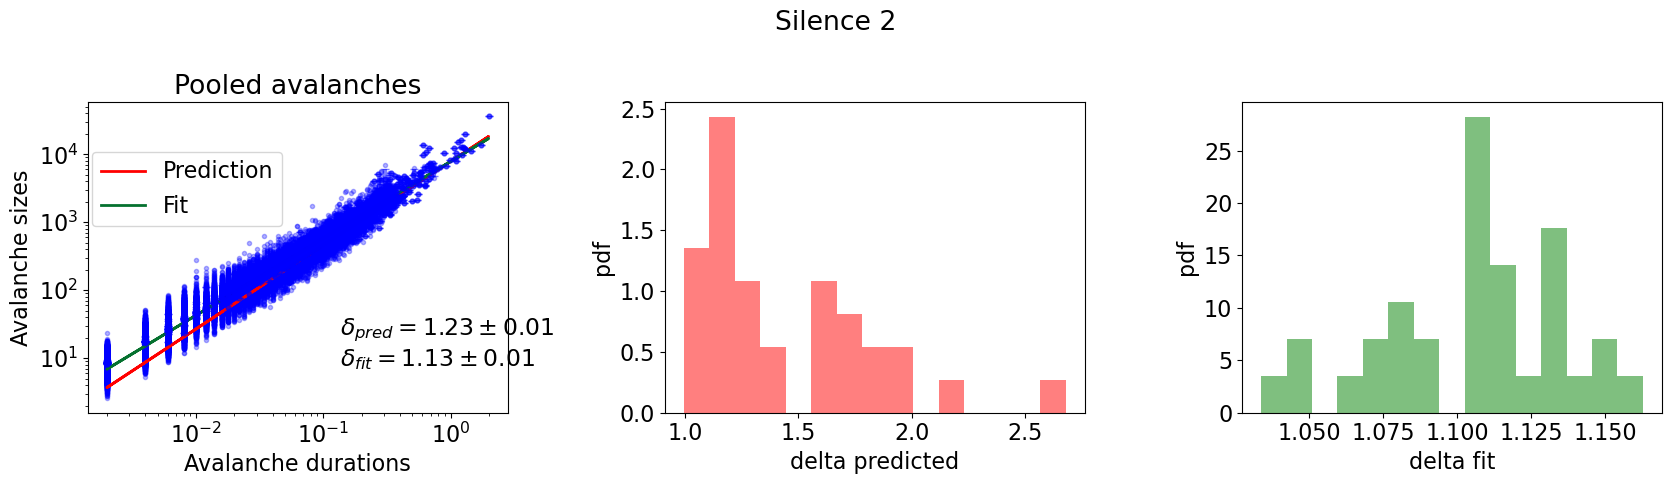

In [31]:

value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (17,5))
fig.suptitle('Silence 1')

axsd = fig.add_subplot(1,3,1)
axh1 = fig.add_subplot(1,3,2)
axh2 = fig.add_subplot(1,3,3)
#axdh = fig.add_subplot(2,2,4)
alphas = []

pred = []
fit =[]
totals = []
totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(ss)):

    s = ss[i]
    d = dd[i]*0.002
    
    v = scaling(s,d, ax = axsd)
    #axd.annotate("alpha= {}".format(round(exp,2)),[0.8,0.5])
    pred.append(v[0])
    fit.append(v[2])
    #if i == 1: break
    


    totals += ss[i].tolist()
    totald += d.tolist()
    #i+=1



totals = np.asarray(totals)
totald = np.asarray(totald)
v = scaling(totals,totald, ax = axsd, plotto = True)
#axsd.set_ylim(10**2.5, 10**5)
axsd.set_title('Pooled avalanches')


    
axh1.hist(pred, bins = 15, color = 'red', alpha = .5, density = True)
axh1.set_xlabel('delta predicted')
axh1.set_ylabel('pdf')

axh2.hist(fit, bins = 15, color = 'green', alpha = .5, density = True)
axh2.set_xlabel('delta fit')
axh2.set_ylabel('pdf')

plt.tight_layout()

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.1717075899000882 +- 0.07710632852344296
Fit from of average size given duration points: delta =  1.1453976151520244 +- 0.011762773968597698
Calculating best minimal value for power law fit


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_8600\3259361468.py:147: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([pred, errpred,fit,errfit,a,b,c])


Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  2.3927457183218688 +- 0.16057189718716341
Fit from of average size given duration points: delta =  1.1360553306374963 +- 0.010002216549032236
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.0734530718383493 +- 0.05829521353600677
Fit from of average size given duration points: delta =  1.1241066198295027 +- 0.010687345836283663
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.2671606374125164 +- 0.0814346650222497
Fit from of average size given duration points: delta =  1.119489059580511 +- 0.01134335818660616
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  0.9684765591798146 +- 0.064167

Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.6869950277382282 +- 0.1278091739937524
Fit from of average size given duration points: delta =  1.127542523907222 +- 0.009622052900324302
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  2.5338806703728705 +- 0.15210496345419805
Fit from of average size given duration points: delta =  1.1055521624851061 +- 0.010510187122164774
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.784241402972784 +- 0.13526035838439696
Fit from of average size given duration points: delta =  1.12386225176432 +- 0.010569989662289607
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  2.007823015502942 +- 0.023448238

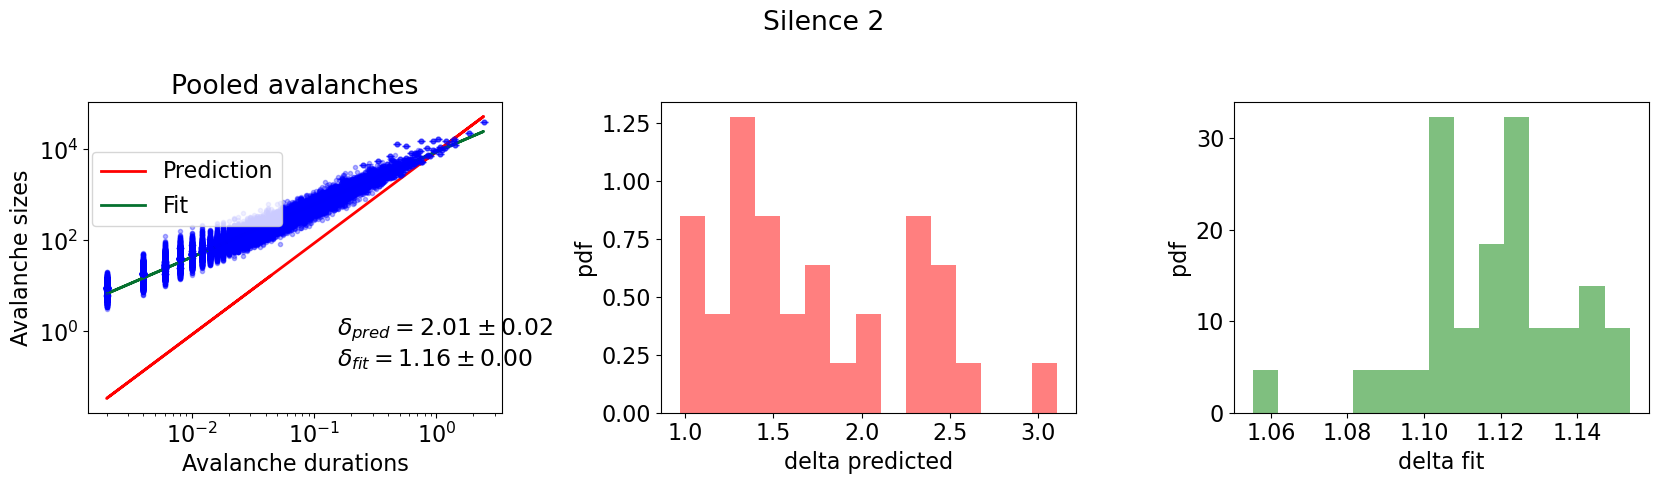

In [30]:

value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (17,5))
fig.suptitle('Silence 2')

axsd = fig.add_subplot(1,3,1)
axh1 = fig.add_subplot(1,3,2)
axh2 = fig.add_subplot(1,3,3)
#axdh = fig.add_subplot(2,2,4)
alphas = []

pred = []
fit =[]
totals = []
totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(ss)):

    s = ss2[i]
    d = dd2[i]*0.002
    
    v = scaling(s,d, ax = axsd)
    #axd.annotate("alpha= {}".format(round(exp,2)),[0.8,0.5])
    pred.append(v[0])
    fit.append(v[2])
    #if i == 1: break
    


    totals += ss2[i].tolist()
    totald += d.tolist()
    #i+=1



totals = np.asarray(totals)
totald = np.asarray(totald)
v = scaling(totals,totald, ax = axsd, plotto = True)
#axsd.set_ylim(10**2.5, 10**5)
axsd.set_title('Pooled avalanches')


    
axh1.hist(pred, bins = 15, color = 'red', alpha = .5, density = True)
axh1.set_xlabel('delta predicted')
axh1.set_ylabel('pdf')

axh2.hist(fit, bins = 15, color = 'green', alpha = .5, density = True)
axh2.set_xlabel('delta fit')
axh2.set_ylabel('pdf')

plt.tight_layout()

In [34]:
### COMPARISON BETWEEN SILENCE1 AND SILENCE2

import os
import numpy as np
import scipy.signal as ss
import scipy.io
#from dfa_functions import *

overlap =0.5
bands = [[1,3],[4,8],[8,13],[14,30],[31,60]]
labels = ['band-1', 'band-2', 'band-3', 'band-4', 'band-5']
subjs  = [5,6,9,11,12,13,16,17,18,19,21,23,24,25,30,33,34,35,37,39,40,45,47,49,52,53,56,57,58,60,62,63,65,66,67,68,69,71,14,20,22,27,28,29,31,41,46,64,70]
print(len(subjs))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
from scipy.signal import welch
import pandas as pd
import mne
ch_names = ['F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8']
int1 = []
int2 = []



ch_names = np.array(ch_names)
sfreq = 500
info = mne.create_info(ch_names = list(ch_names),
                       ch_types = 'eeg',
                       sfreq = sfreq)
def find_bad_channels(data, MAX_PEAK=200, MAX_PEAK_SIGMA=15, MAX_DIST_PS=4.5e-3, OFFSET=30, fmin=1, fmax=100, 
                      verbose = True):
    idx_down, idx_up = 0, data.shape[1]
    ss = np.std(data)
    
    psds, freqs = mne.time_frequency.psd_welch(mne.io.RawArray(data/1e6, info, verbose=False), fmin=fmin, fmax=fmax, n_fft=2048, n_overlap=1024/2, verbose=False)
    psds = np.log10(psds)
    
    dist = [((tmp-psds.mean(axis=0))**2).sum() for tmp in psds]
    dist = np.array(dist) / (psds**2).sum() * 1e2
    
    rej = []
    for i, ch in enumerate(ch_names):
        delta = np.abs(data[i]).max()
    
        str_rej = str()

        if delta>MAX_PEAK or dist[i]>MAX_DIST_PS:
            rej.append(ch)
            str_rej = '-> rejected'
            str_rej += ' ('
            if delta>MAX_PEAK:
                str_rej += ' peak'
                idx = np.where(np.abs(data[i])>MAX_PEAK)[0]
            
            if dist[i]>MAX_DIST_PS:
                str_rej += ' ps'
            str_rej += ')'
            
        if verbose: print(f'* {ch}: max peak = {np.round(delta, 2)} mV ({np.round(delta/ss, 2)} std); dist ps = {np.round(dist[i],3)} '+str_rej)
        
        if delta>MAX_PEAK:
            if np.max(idx)/sfreq<OFFSET:
                idx_down = np.max([np.max(idx),idx_down])
                if verbose: print(f'[*] WARNING: Peak only in the initial part - time: {np.max(idx)/sfreq} s')
            if np.min(idx)/sfreq>180-OFFSET:
                idx_up = np.min([np.min(idx),idx_up])
                if verbose: print(f'[*] WARNING: Peak only in the last part - time: {np.min(idx)/sfreq} s')
    if verbose: print('\nBad channels:', rej, '\n')
    return rej, idx_down, idx_up




o = 0
for i, subj in enumerate(subjs):
    print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up]
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up]
    nchan2 = data2.shape[0]
    print(nchan, nchan2)
    if nchan >= 5 and nchan2 >=5:
        
        
        print('doing')
        d = intertimes(data.T,2)
        d2 = intertimes(data2.T,2)

        int1.append(d)

        int2.append(d2)
        o += 1
        

49


########## SUBJ 5 (1/49)##########
7 10
doing


########## SUBJ 6 (2/49)##########
10 10
doing


########## SUBJ 9 (3/49)##########
9 10
doing


########## SUBJ 11 (4/49)##########
10 10
doing


########## SUBJ 12 (5/49)##########
10 7
doing


########## SUBJ 13 (6/49)##########
0 8


########## SUBJ 16 (7/49)##########
9 10
doing


########## SUBJ 17 (8/49)##########
10 10
doing


########## SUBJ 18 (9/49)##########
8 9
doing


########## SUBJ 19 (10/49)##########
9 10
doing


########## SUBJ 21 (11/49)##########
9 1


########## SUBJ 23 (12/49)##########
8 10
doing


########## SUBJ 24 (13/49)##########
0 10


########## SUBJ 25 (14/49)##########
2 10


########## SUBJ 30 (15/49)##########
10 8
doing


########## SUBJ 33 (16/49)##########
7 9
doing


########## SUBJ 34 (17/49)##########
0 10


########## SUBJ 35 (18/49)##########
9 10
doing


########## SUBJ 37 (19/49)##########
10 10
doing


########## SUBJ 39 (20/49)##########
4 9


########## SUBJ 40 (21/49)##########
6 8
doi

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less tha

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less tha

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

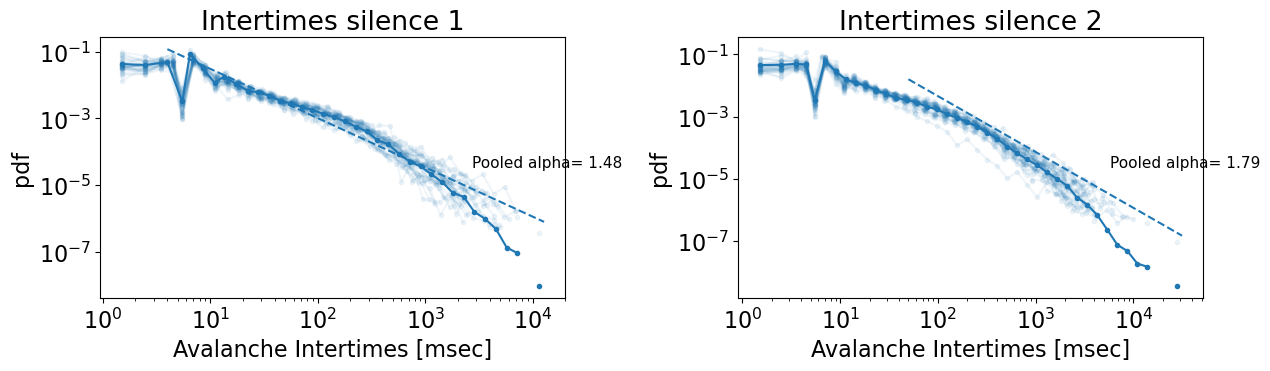

In [41]:
value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
axd = fig.add_subplot(1,2,1)
axd2 = fig.add_subplot(1,2,2)

#axd = fig.add_subplot(,2,2)
#axsh = fig.add_subplot(2,2,3)
#axdh = fig.add_subplot(2,2,4)
#alphas = []

taus = []
#totals = []
totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(int1)):

    #s = ss[i]
    d = int1[i] 
    data = d*2
    fit = pwl.Fit(data,xmin = (0.,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
    exp = fit.power_law.alpha
    try:
        pwl.plot_pdf(data,color = 'tab:blue', marker = '.', ax = axd, alpha = 0.07, linear_bins = False)
    except:
        continue
    #fit.power_law.plot_pdf(data,color = 'tab:green' ,linestyle = '--', ax = axd, alpha = 0.6)

    

  
    #totals += ss[i].tolist()
    totald += data.tolist()
    #i+=1
totald2 = []
for i in range(len(int2)):
    
    #s = ss[i]
    d = int2[i] 
    data = d*2
    fit = pwl.Fit(data,xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
    exp = fit.power_law.alpha
    try:
        pwl.plot_pdf(data,color = 'tab:blue', marker = '.', ax = axd2, alpha = 0.07, linear_bins = False)
        #fit.power_law.plot_pdf(data,color = 'tab:green' ,linestyle = '--', ax = axd, alpha = 0.6)
    except:
        continue

    
    
    #totals += ss[i].tolist()
    totald2 += data.tolist()
    #i+=1

axd.set_xlabel(r'Avalanche Intertimes [msec]')
axd.set_ylabel(r'pdf')

axd2.set_xlabel(r'Avalanche Intertimes [msec]')
axd2.set_ylabel(r'pdf')
axd.set_title('Intertimes silence 1')

axd2.set_title('Intertimes silence 2')

#totals = np.asarray(totals)
totald = np.asarray(totald)
#total2d = np.asarray(totald2)


data = totald
fit = pwl.Fit(data,xmin = (0.,50), xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
exp = fit.power_law.alpha
axd.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction', fontsize = 11)
pwl.plot_pdf(data,color = 'tab:blue', marker = '.', ax = axd)
fit.power_law.plot_pdf(data,color = 'tab:blue' ,linestyle = '--', ax = axd)





#totals = np.asarray(totals)
totald2 = np.asarray(totald2)

data = totald2
fit = pwl.Fit(data,xmin = (0.,50), xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
exp = fit.power_law.alpha
axd2.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction', fontsize = 11)
pwl.plot_pdf(data,color = 'tab:blue', marker = '.', ax = axd2)
fit.power_law.plot_pdf(data,color = 'tab:blue' ,linestyle = '--', ax = axd2)
## check duratio
        
plt.tight_layout()